In [9]:
import tensorflow as tf

a_value = float(input("Enter the value of a: "))
b_value = float(input("Enter the value of b: "))

a = tf.constant(a_value)
b = tf.constant(b_value)

addition = a + b
subtraction = a - b
multiplication = a * b
division = tf.divide(a, b) 

print("Addition:", addition.numpy())
print("Subtraction:", subtraction.numpy())
print("Multiplication:", multiplication.numpy())
print("Division:", division.numpy())


Enter the value of a:  5
Enter the value of b:  4


Addition: 9.0
Subtraction: 1.0
Multiplication: 20.0
Division: 1.25


In [11]:
#sobia
import tensorflow as tf

# Take user input for variables
x_value = float(input("Enter the value of x: "))
y_value = float(input("Enter the value of y: "))

# Perform some operations
sum_square = tf.square(x_value) + tf.square(y_value)
square_root = tf.sqrt(sum_square)
mean = (x_value + y_value) / 2

# Print results
print("Sum of squares:", sum_square.numpy())
print("Square root of sum of squares:", square_root.numpy())
print("Mean of x and y:", mean)

Enter the value of x:  5
Enter the value of y:  4


Sum of squares: 41.0
Square root of sum of squares: 6.4031243
Mean of x and y: 4.5


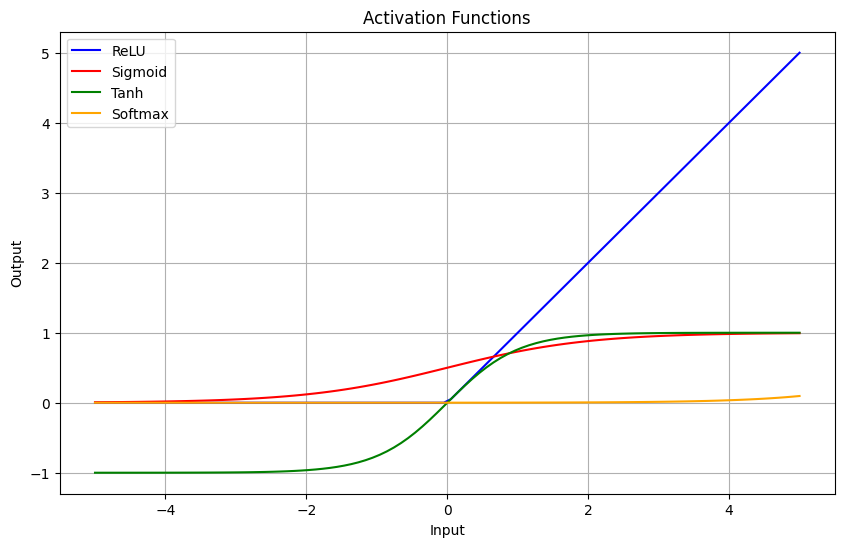

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Generate data
x = np.linspace(-5, 5, 100)
y_relu = np.maximum(0, x)  # ReLU function
y_sigmoid = 1 / (1 + np.exp(-x))  # Sigmoid function
y_tanh = np.tanh(x)  # Tanh function
y_softmax = np.exp(x) / np.sum(np.exp(x))  # Softmax function

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y_relu, label='ReLU', color='blue')
plt.plot(x, y_sigmoid, label='Sigmoid', color='red')
plt.plot(x, y_tanh, label='Tanh', color='green')
plt.plot(x, y_softmax, label='Softmax', color='orange')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


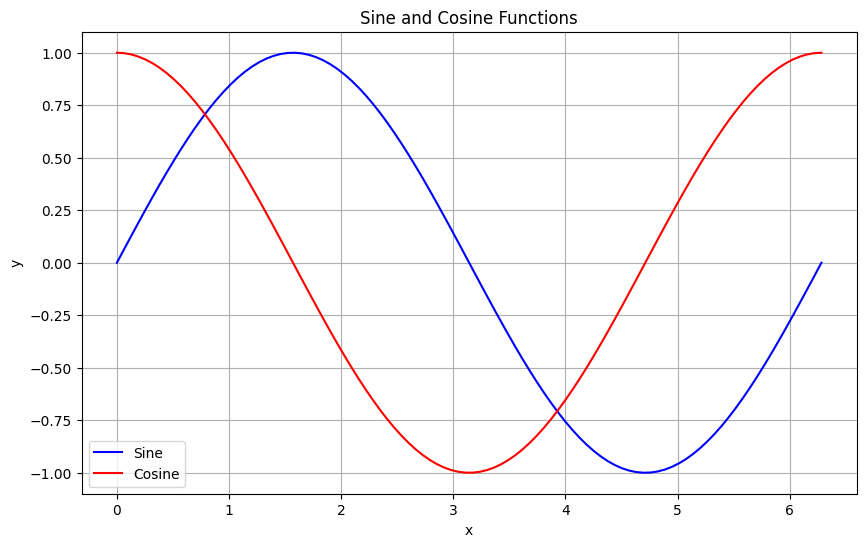

In [13]:
#sobia
import numpy as np
import matplotlib.pyplot as plt
import math

# Generate data
x = np.linspace(0, 2*np.pi, 100)
y_sin = np.sin(x)  # Sine function
y_cos = np.cos(x)  # Cosine function

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y_sin, label='Sine', color='blue')
plt.plot(x, y_cos, label='Cosine', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine and Cosine Functions')
plt.legend()
plt.grid(True)
plt.show()


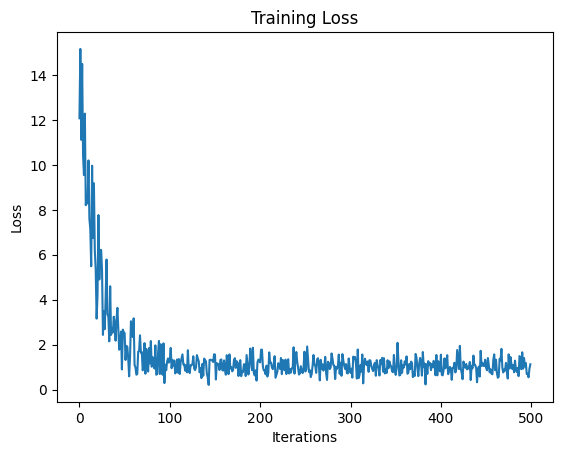

Learned weight: [[2.347233]]
Learned bias: [2.5197392]


In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.rand(100, 1).astype(np.float32)
y = 3 * X + 2 + np.random.randn(100, 1).astype(np.float32)

# Define the linear regression model
class LinearRegressionModel(tf.keras.Model):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.dense = tf.keras.layers.Dense(units=1)

    def call(self, inputs):
        return self.dense(inputs)

model = LinearRegressionModel()

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(10)

def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

epochs = 50
losses = []
for epoch in range(epochs):
    for inputs, labels in train_dataset:
        loss = train_step(inputs, labels)
        losses.append(loss.numpy())

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

weights = model.dense.weights[0].numpy()
bias = model.dense.weights[1].numpy()
print("Learned weight:", weights)
print("Learned bias:", bias)


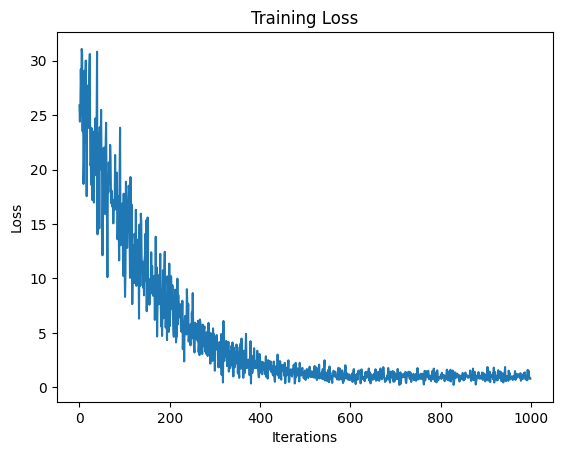

Learned weight: [[4.6565285]]
Learned bias: [3.3624144]


In [15]:
#sobia
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.rand(100, 1).astype(np.float32)
y = 5 * X + 3 + np.random.randn(100, 1).astype(np.float32)

class LinearRegressionModel(tf.keras.Model):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.dense = tf.keras.layers.Dense(units=1)

    def call(self, inputs):
        return self.dense(inputs)

model = LinearRegressionModel()

# Define the loss function and optimizer
loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(10)

def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

epochs = 100
losses = []
for epoch in range(epochs):
    for inputs, labels in train_dataset:
        loss = train_step(inputs, labels)
        losses.append(loss.numpy())

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

weights = model.dense.weights[0].numpy()
bias = model.dense.weights[1].numpy()
print("Learned weight:", weights)
print("Learned bias:", bias)


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Generate some sample data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] * 3 + X[:, 1] * 2 > 2).astype(int)  # y = 1 if 3*x1 + 2*x2 > 2, else 0

# Define the model
model = tf.keras.Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))
])

# Compile the model with optimizer
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=50, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6000
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6000
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.6000
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6000
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6000
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6000
Epoch 11/50
4/4 [======================

In [29]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
w=tf.Variable([.2])
b=tf.Variable([-.2])

x= tf.compat.v1.placeholder(tf.float32)
y= tf.compat.v1.placeholder(tf.float32)

linear_model= w * x + b
init = tf.compat.v1.global_variables_initializer()

s= tf.compat.v1.Session()

s.run(init)
print(s.run(w))
print(s.run(b))

squared_deltas = tf.square(linear_model -y)
loss = tf.reduce_sum(squared_deltas)

print("loss or Error is ")
print(s.run(loss, {x:[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], y:[0,-1,-2,-3,-6,-7,-8,-10,-14,-15,-16,-17,-11,-5,-3]}))

optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)
s.run(init)
for i in range(2):
    s.run(train, {x:[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], y:[0,-1,-2,-3,-6,-7,-8,-10,-14,-15,-16,-17,-11,-5,-3]})
print(s.run([w,b]))
s.run(linear_model, {x:[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], y:[0,-1,-2,-3,-6,-7,-8,-10,-14,-15,-16,-17,-11,-5,-3]})
s.run(loss, {x:[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], y:[0,-1,-2,-3,-6,-7,-8,-10,-14,-15,-16,-17,-11,-5,-3]})


[0.2]
[-0.2]
loss or Error is 
1834.2
[array([67874.6], dtype=float32), array([6584.4], dtype=float32)]


5820699000000.0

In [30]:
#sobia
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

w = tf.Variable([0.3])
b = tf.Variable([-0.1])

x = tf.compat.v1.placeholder(tf.float32)
y = tf.compat.v1.placeholder(tf.float32)

linear_model = w * x + b
init = tf.compat.v1.global_variables_initializer()

sess = tf.compat.v1.Session()
sess.run(init)

print(sess.run(w))
print(sess.run(b))

squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

print("Initial loss:")
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess.run(init)

for i in range(1000):
    sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

print(sess.run([w, b]))

print("Output of the model after optimization:")
print(sess.run(linear_model, {x: [1, 2, 3, 4]}))

print("Final loss:", sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

sess.close()


[0.3]
[-0.1]
Initial loss:
26.939999
[array([-0.99999726], dtype=float32), array([0.999992], dtype=float32)]
Output of the model after optimization:
[-5.2452087e-06 -1.0000025e+00 -1.9999999e+00 -2.9999971e+00]
Final loss: 4.1978865e-11
